In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [4]:
mat1 = material(1.45^2,1.0)
mat2 = material(epstable("gold"),1.0)
matScatter = [mat1; mat2];

In [5]:
λ = 500:15:900
k₀ = 2π./λ;

In [6]:
w,d = 66.,20.
rc = 2.
Nc,Nw,Nd = 3,5,5;

In [7]:
rod₁ = Rod(w,d,rc,Nc,Nw,Nd,(0.,20.))
rod₂ = Rod(w,d,rc,Nc,Nw,Nd,(0.,-20.));

In [8]:
xmin,ymin = -200.0,-200.0
xmax,ymax = 200.0,200.0
Δx,Δy = 10.0,10.0
m= 2
xA = collect(xmin:Δx:xmax)
yA = collect(ymin:Δy:ymax);
#Xin,Xout,Yin,Yout = getMesh(xA,yA,rod);

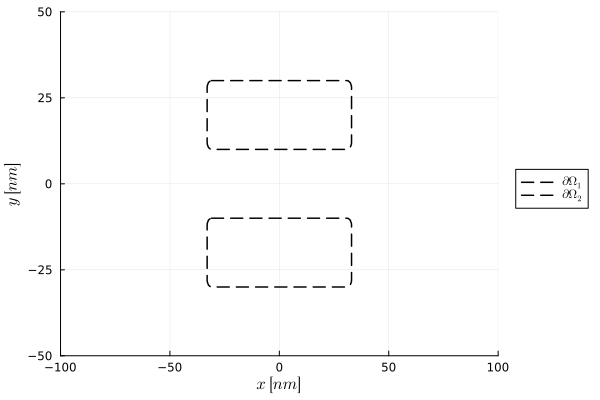

In [9]:
gr()
X₁,Y₁ = getSurfPoints(rod₁)
X₂,Y₂ = getSurfPoints(rod₂)

plot(X₁,Y₁,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega_1",xlabel=L"x~[nm]",ylabel=L"y~[nm]",legend=:outerright,xlims=(-100,100),ylims=(-50,50))
plot!(X₂,Y₂,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega_2",xlabel=L"x~[nm]",ylabel=L"y~[nm]",legend=:outerright)

In [10]:
Structures = StructureC([rod₁; rod₂]);

In [11]:
r = 500.
α = 60.

60.0

In [12]:
@time σₐArr = getσₐ(m,k₀,matScatter,Structures,100.,α);

314.082223 seconds (3.08 G allocations: 152.468 GiB, 14.48% gc time, 5.53% compilation time)


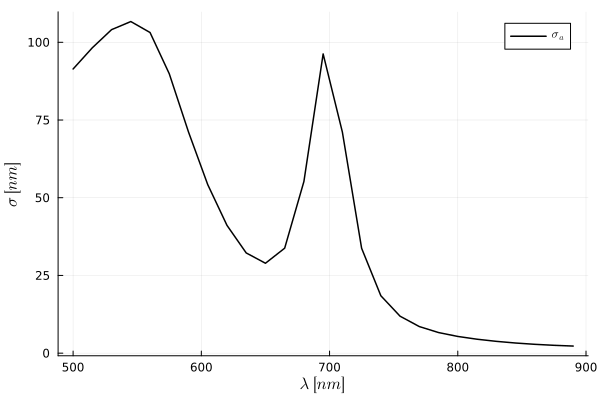

In [13]:
plot(2π./k₀,σₐArr,c=:black,lw=1.5,label=L"\sigma_a",xlabel=L"\lambda ~[nm]",ylabel=L"\sigma ~[nm]")

In [14]:
@time σₛArr = getσₛ(m,k₀,matScatter,Structures,100.,r,α);

470.254458 seconds (4.96 G allocations: 209.022 GiB, 14.19% gc time, 0.27% compilation time)


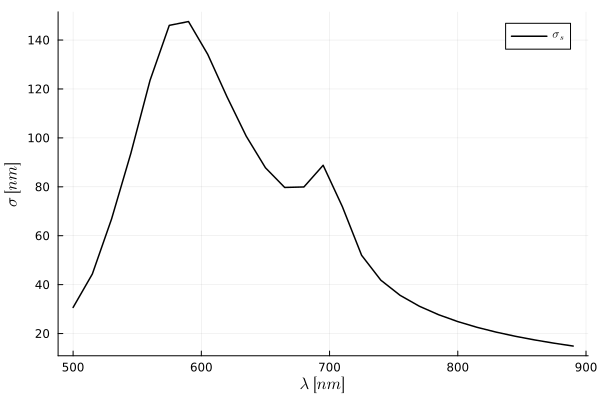

In [15]:
plot(2π./k₀,σₛArr,c=:black,lw=1.5,label=L"\sigma_s",xlabel=L"\lambda ~[nm]",ylabel=L"\sigma ~[nm]")